# Final Project Submission
Please fill out:

* Student name: Peter Kimani
* Student pace: full time
* Instructor name: Mwikali

# Telecom Customer Churn Prediction


Our company wants to determine the likelihood a customer would discontinue their subscription to the services we provide.
Using a dataset containing information collected from each customer a model that predicts the pattern was developed giving insights into the behaviour of current and potential customers.

## Data Understanding

### EDA of Dataset

Import Libraries


In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold



Display Dataset

In [509]:
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv') #dataframe which stores a copy of dataset
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Check for Null Values

In [510]:
df.isna().sum() #display total null values per column

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Statistical summary of non-categorical Numeric Columns

In [511]:
df_numeric = df.select_dtypes(include='number').drop(['area code'],axis=1) #select columns
df_numeric.describe() #summary

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Ratio of Customers that did not churn vs. those that did

In [530]:
churn_values = df['churn'].value_counts(normalize=True) #display percentage of unique values in churn
churn_values

False    0.855086
True     0.144914
Name: churn, dtype: float64

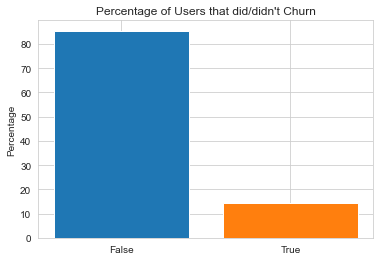

In [642]:
churn_true = churn_values.iloc[1]*100
churn_false = churn_values.iloc[0]*100

sns.set_style('whitegrid')
plt.bar(x='False',height=churn_false)
plt.bar(x='True',height=churn_true)
plt.ylabel('Percentage')
plt.title("Percentage of Users that did/didn't Churn")

plt.show()

## Data Preparation

Convert Churn variable to integer values

In [190]:
df['churn'] = df['churn'].astype(int) #convert bool to int

Drop Irrelevant Columns

In [191]:
df = df.drop(['state','area code','phone number'],axis = 1) #drop columns

Convert Binary Categorical Data to integer values

In [192]:
df = df.replace({'yes':1,'no':0}) #convert string to int value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

Scale Features to appropriate range

In [193]:
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)


In [194]:
df_scaled

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.524793,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.789256,0.0,1.0,0.705882,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.688273,0.352113,0.688583,0.495,0.30,0.494444,0.222222,0.0
3329,0.276860,0.0,0.0,0.000000,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.452125,0.633803,0.452481,0.480,0.20,0.479630,0.333333,0.0
3330,0.111570,0.0,0.0,0.000000,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.453739,0.408451,0.454274,0.705,0.30,0.705556,0.222222,0.0
3331,0.756198,1.0,0.0,0.000000,0.609464,0.636364,0.609490,0.438823,0.494118,0.439016,0.311996,0.732394,0.312014,0.250,0.50,0.250000,0.222222,0.0


In [195]:
df_scaled['churn'].value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64

## Modeling


### View Correlation between Variables

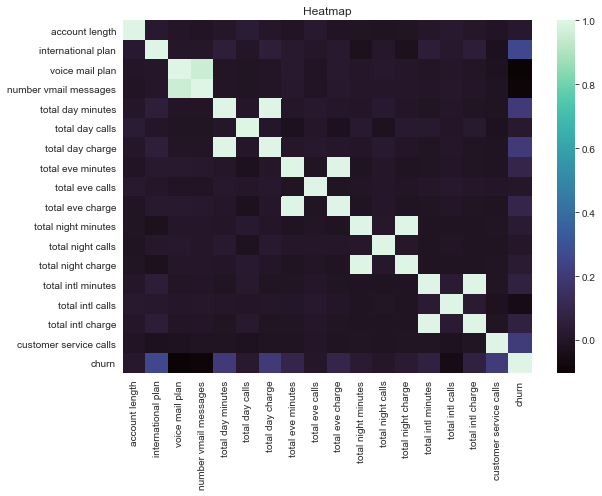

In [196]:
correlation_matrix = df.corr() #correlation matrix
plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, cmap= 'mako') #heatmap visualization
plt.title('Heatmap')
plt.tight_layout()

Heat map shows low correlation between variables and a low chance of multicollinearity. Although, some variables are intrinsically tied together (e.g total day calls, total day minutes and total day charge) which show high correlations on the heatmap, but these measurements are relevant separately.

### Customer Loyalty

Our baseline model should be based on how long a customer has been a client, as longterm customers are unlikely to leave. Especially if they have been a client for years/decades.

#### Logistic Regression Model with Account Length


Set X,y variables

In [471]:
X = df_scaled[['account length','customer service calls']] # one added variable due to minimum variables allowed in fitting
y = df_scaled['churn'] #target variable

In [472]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0) #split data for testing

In [473]:
logreg = LogisticRegression(fit_intercept=False, C=1e12,                    #Logististic regression model with parameters
                            solver='liblinear',class_weight='balanced')     #class weight balanced
model_log = logreg.fit(X_train, y_train)


In [474]:
y_preds = logreg.predict(X_test) #predictions based on model

In [475]:
confusion_matrix_ = confusion_matrix(y_test,y_preds) #create confusion matrix 

Text(0.5, 257.44, 'Predicted label')

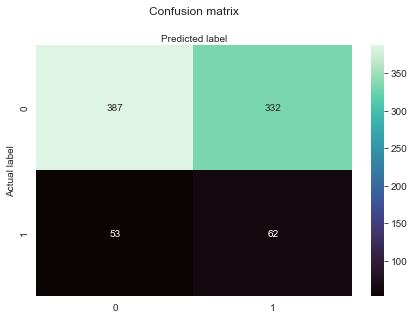

In [476]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
target_names = ['Did not Churn', 'Churned']
report_account= classification_report(y_test, y_preds, target_names=target_names) #Evaluation metrics
report_account

               precision    recall  f1-score   support

Did not Churn       0.88      0.54      0.67       719
      Churned       0.16      0.54      0.24       115

     accuracy                           0.54       834
    macro avg       0.52      0.54      0.46       834
 weighted avg       0.78      0.54      0.61       834



In [ ]:
score = cross_val_score(logreg,X,y,cv=10) #accuracy scores for 10 different folds
score

array([0.53592814, 0.53892216, 0.60179641, 0.56156156, 0.55255255,
       0.53153153, 0.51651652, 0.53753754, 0.57057057, 0.58258258])

The accuracy of this model is pretty low showing a 54% classification rate. Based solely on the age of the account, the model does not consistently determine whether a customer would 'churn'.

In [479]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test) #y_score array


In [480]:
fpr, tpr, thresholds = roc_curve(y_test, y_score) #False Positive Rate, True Positive Rate

AUC: 0.5670375521557719


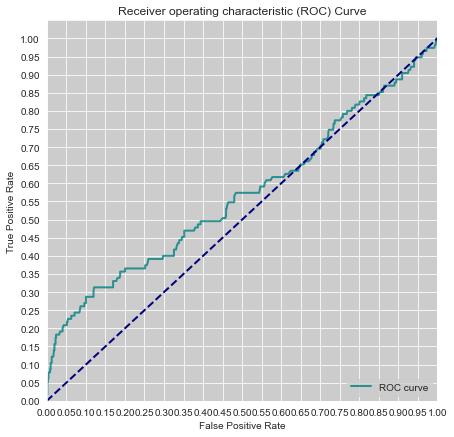

In [481]:
sns.set_style('darkgrid', {'axes.facecolor': '0.8'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(7, 7))
lw = 2
plt.plot(fpr, tpr, color='teal',
         lw=lw, label='ROC curve', alpha = 0.8)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area Under the Curve is low at 0.57 showing the model does not classify the rate of 'churn' well yet

In [482]:
def y_predictions(X_train,y_train):
    model_log_ = logreg.fit(X_train, y_train)
    y_preds = logreg.predict(X_test)
    return y_preds

In [483]:
def confusion_matrix_plot(cm):  
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="mako" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [484]:
def roc_plot(fpr,tpr):
    sns.set_style('darkgrid', {'axes.facecolor': '0.8'})

    print('AUC: {}'.format(auc(fpr, tpr)))
    plt.figure(figsize=(7, 7))
    lw = 2
    plt.plot(fpr, tpr, color='teal',
            lw=lw, label='ROC curve', alpha = 0.8)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

### Additional Plans opted for by Users

With the next iteration of the model, information on whether each user has opted for additional plans will be added to the predictor variables.

In [485]:
X = df_scaled[['account length', 'international plan', 'voice mail plan',
       'number vmail messages','customer service calls']]
y = y #same target variable

In [486]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [487]:
y_preds = y_predictions(X_train,y_train) #get predictions

In [488]:
cm = confusion_matrix(y_test,y_preds) #create confusion matrix 

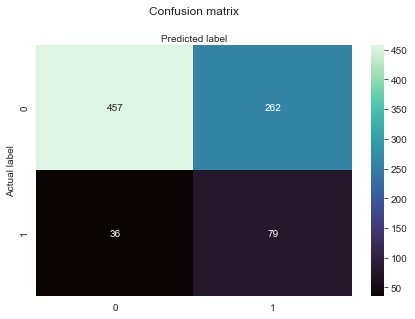

In [489]:
confusion_matrix_plot(cm)

Here we see more True Positives and True Negatives showing this iteration classifies the Users better. The addition of features the customers opt for better describes the churn rate.

In [ ]:
report_plans = classification_report(y_test, y_preds, target_names=target_names) #Evaluation metrics
report_plans

               precision    recall  f1-score   support

Did not Churn       0.93      0.64      0.75       719
      Churned       0.23      0.69      0.35       115

     accuracy                           0.64       834
    macro avg       0.58      0.66      0.55       834
 weighted avg       0.83      0.64      0.70       834



In [ ]:
score = cross_val_score(logreg,X,y,cv=10) #accuracy scores for 10 different folds
score

array([0.65269461, 0.66167665, 0.67664671, 0.63963964, 0.69369369,
       0.63363363, 0.66666667, 0.63963964, 0.65465465, 0.6996997 ])

The accuracy has improved by 10 points indicating the added variables are significant.

In [492]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test) #y_score array


In [493]:
fpr, tpr, thresholds = roc_curve(y_test, y_score) #False Positive Rate, True Positive Rate

AUC: 0.7372316623329503


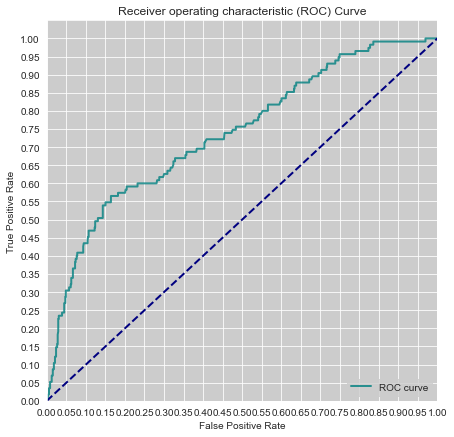

In [494]:
roc_plot(fpr,tpr)

The AUC has increased to 0.74 showing greater probability in classifying the data correctly.

### Total Usage

Including the total usage of customers would serve to better fit our model

In [495]:
X = df_scaled.drop(['churn'],axis=1)
y = y #same target variable

In [496]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [497]:
y_preds = y_predictions(X_train,y_train) #get predictions

In [498]:
cm = confusion_matrix(y_test,y_preds) #create confusion matrix 

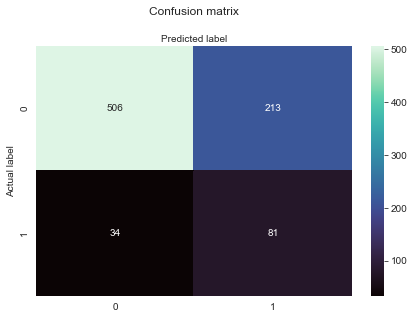

In [499]:
confusion_matrix_plot(cm)

In [ ]:
report_usage = classification_report(y_test, y_preds, target_names=target_names) #Evaluation metrics
report_usage

               precision    recall  f1-score   support

Did not Churn       0.94      0.70      0.80       719
      Churned       0.28      0.70      0.40       115

     accuracy                           0.70       834
    macro avg       0.61      0.70      0.60       834
 weighted avg       0.85      0.70      0.75       834



In [ ]:
score = cross_val_score(logreg,X,y,cv=10) #accuracy scores for 10 different folds
score

array([0.66467066, 0.74251497, 0.73053892, 0.70870871, 0.74474474,
       0.73273273, 0.75075075, 0.73273273, 0.72972973, 0.75375375])

The accuracy has improved by only 6 points indicating the added variables are significant however there may still be an underlying problem with the class imbalance. The recall for Churned here is at 0.70, True Positives at 81: The model estimates the 'churn' rate well

In [502]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test) #y_score array


In [503]:
fpr, tpr, thresholds = roc_curve(y_test, y_score) #False Positive Rate, True Positive Rate

AUC: 0.7797907722077765


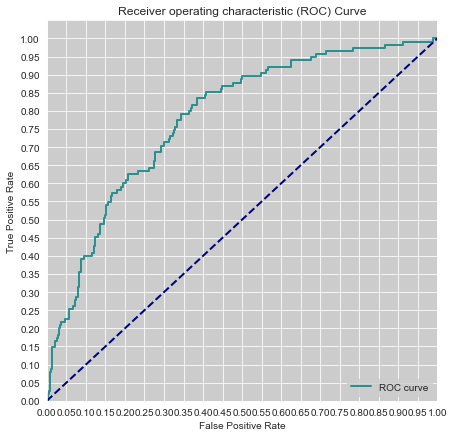

In [504]:
roc_plot(fpr,tpr)

The ROC curve has improved with an AUC of 0.78 showing an increase in the probability of estimating the 'churn' rate correctly.

### Adjusting for Optimum Class Weights 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   26.2s finished
c:\Users\peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\peter\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

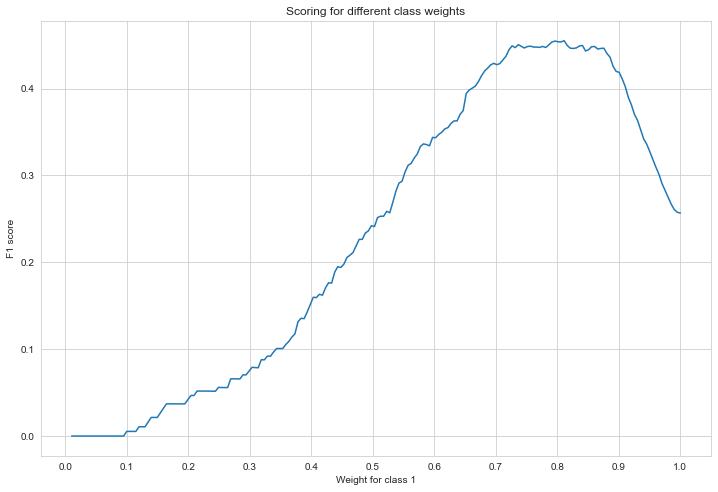

In [643]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='sag')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= logreg, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(shuffle=True,random_state=0), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights')

In [628]:
gridsearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_class_weight', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [629]:
class_1 = weigh_data['weight'].iloc[weigh_data['score'].idxmax()]
class_0 = 1-class_1

In [630]:
X = df_scaled.drop(['churn'],axis=1)
y = y #same target variable

In [631]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [632]:
logreg = LogisticRegression(fit_intercept=False, C=1e12,                               #Logististic regression model with parameters
                            solver='liblinear',class_weight={0:class_0,1:class_1})     #class weight balanced

In [633]:
y_preds = y_predictions(X_train,y_train) #get predictions

In [634]:
cm = confusion_matrix(y_test,y_preds) #create confusion matrix 

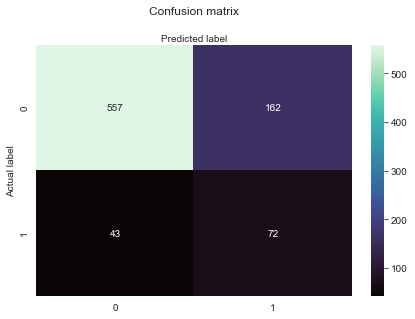

In [635]:
confusion_matrix_plot(cm)

In [ ]:
report_optimized_f1 = classification_report(y_test, y_preds, target_names=target_names) #Evaluation metrics
report_optimized_f1

               precision    recall  f1-score   support

Did not Churn       0.93      0.77      0.84       719
      Churned       0.31      0.63      0.41       115

     accuracy                           0.75       834
    macro avg       0.62      0.70      0.63       834
 weighted avg       0.84      0.75      0.79       834



In [ ]:
score_optimized_f1 = cross_val_score(logreg,X,y,cv=10) #accuracy scores across 10 different folds
score_optimized_f1

array([0.73053892, 0.79341317, 0.77245509, 0.76876877, 0.77177177,
       0.77777778, 0.77777778, 0.80780781, 0.77777778, 0.81081081])

The model now has a classification rate of 75%, but the True Positives has reduced to 72 giving a lower recall of 0.63.
Overall the model performs better but at cost of the specific information we require.

In [638]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test) #y_score array


In [639]:
fpr, tpr, thresholds = roc_curve(y_test, y_score) #False Positive Rate, True Positive Rate

AUC: 0.7765616496341538


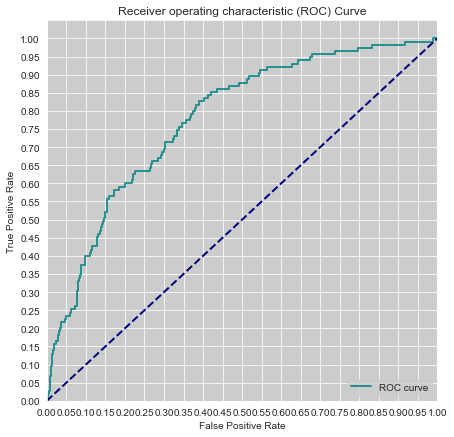

In [640]:
roc_plot(fpr,tpr)

The AUC has slightly decreased: the model estimates churn probabilities better with balanced weight classes.

## Evaluation

The best model that estimates the Churn rate would be a Logistic Regression model that contains information on
* How long a customer has had an account.
* If they have opted for additional services.
* Their total usage throughout the day.

In [665]:
X = df_scaled.drop(['churn'],axis=1)
y = y #same target variable

In [676]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42) #training data and test data

In [677]:
logreg = LogisticRegression(fit_intercept=False, C=1e12,                    #Logististic regression model with parameters
                            solver='liblinear',class_weight='balanced')

In [678]:
y_preds = y_predictions(X_train,y_train) #get predictions

In [679]:
cm = confusion_matrix(y_test,y_preds) #create confusion matrix 

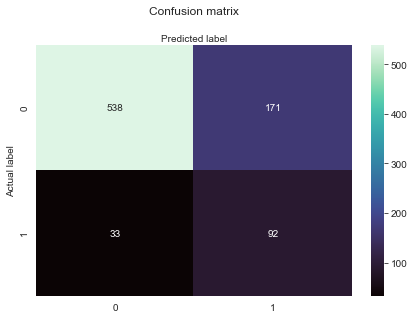

In [680]:
confusion_matrix_plot(cm)

In [681]:
report_usage = classification_report(y_test, y_preds, target_names=target_names) #Evaluation metrics
print(report_usage)

               precision    recall  f1-score   support

Did not Churn       0.94      0.76      0.84       709
      Churned       0.35      0.74      0.47       125

     accuracy                           0.76       834
    macro avg       0.65      0.75      0.66       834
 weighted avg       0.85      0.76      0.79       834



Recall for the churn rate is measured at 0.74 with an accuracy of 76%

In [698]:
accuracy = cross_val_score(logreg,X,y,scoring='accuracy',cv=10) #recall across 10 folds

recall = cross_val_score(logreg,X,y,scoring='recall',cv=10) #recall across 10 folds
print(f'Calculating across 10 folds the mean recall: {np.mean(recall)}, and mean accuracy: {np.mean(accuracy)}')

Calculating across 10 folds the mean recall: 0.7348639455782313, and mean accuracy: 0.7290877704051357


In [683]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test) #y_score array


In [684]:
fpr, tpr, thresholds = roc_curve(y_test, y_score) #False Positive Rate, True Positive Rate

AUC: 0.8008124118476727


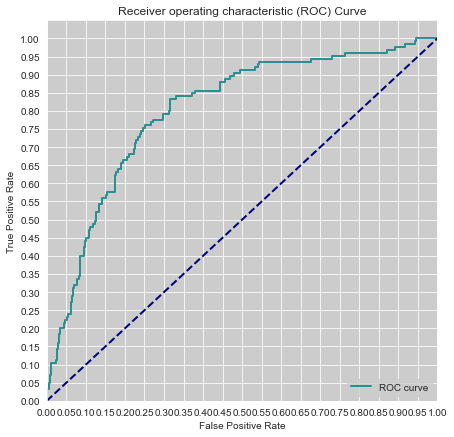

In [685]:
roc_plot(fpr,tpr)

AUC for the ROC curve: 0.80. High probability the model estimates the classes well